<a href="https://colab.research.google.com/github/Sanjana060101/ML-/blob/main/8_2_convolutional_neural_network_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

---
https://www.superdatascience.com/blogs/the-ultimate-guide-to-convolutional-neural-networks-cnn

---
ANN takes input vector(features) for predictions . With CNN , we add convolutional layer before our ANN model and now we can also take images , 3D frames as an input for our model , CNN studies it and transforms this into a perfect input form for the following ANN type model . ***It basically modifies the ouput and then perform the job of ANN ( ANN with specially modified/transformed/learned inputs === CNN )*** Here , convolution term is from the same convolutional function we used to use in SnS . Simply shows how one function modifies the shape of the other function . 

---
Images do a have a digital representation . B/W images :- 2D array , every pixel has value from 0 to 255 , that's depicting the intensity of the colour . 0 will be black pixel, 255 is white pixel . For colored pixels ,3D array ,  we got RGB layers . For simplifying things we say , 0 is white and 1 is black .

---
So , we have our pixel matrix with 1's and 0's , now we also have our feature detector . It is conventionally a 3*3 matrix and is usually called kernel or filter as well . We ususally use a stride of 3 by 3 im=n our image.

---




##Feature Detector 






---
This right side image is called a feature map . One of the stride got completely matched with the feature detector and its value in featur map was 4 as all the 4 1's in feature detector got matched with it . This feature map reduces the size of the image and is very much faster .It gets rid of the unneccessary and focus on the features only. Through training the model learns which feature is important and then we change the filters and with every new filter we get a new feature map . All these feature maps combined are called convolutional layer. 

---
They showed so many different filters(feature detectors ) on an image , this generated different feature maps(diff images) . 

---



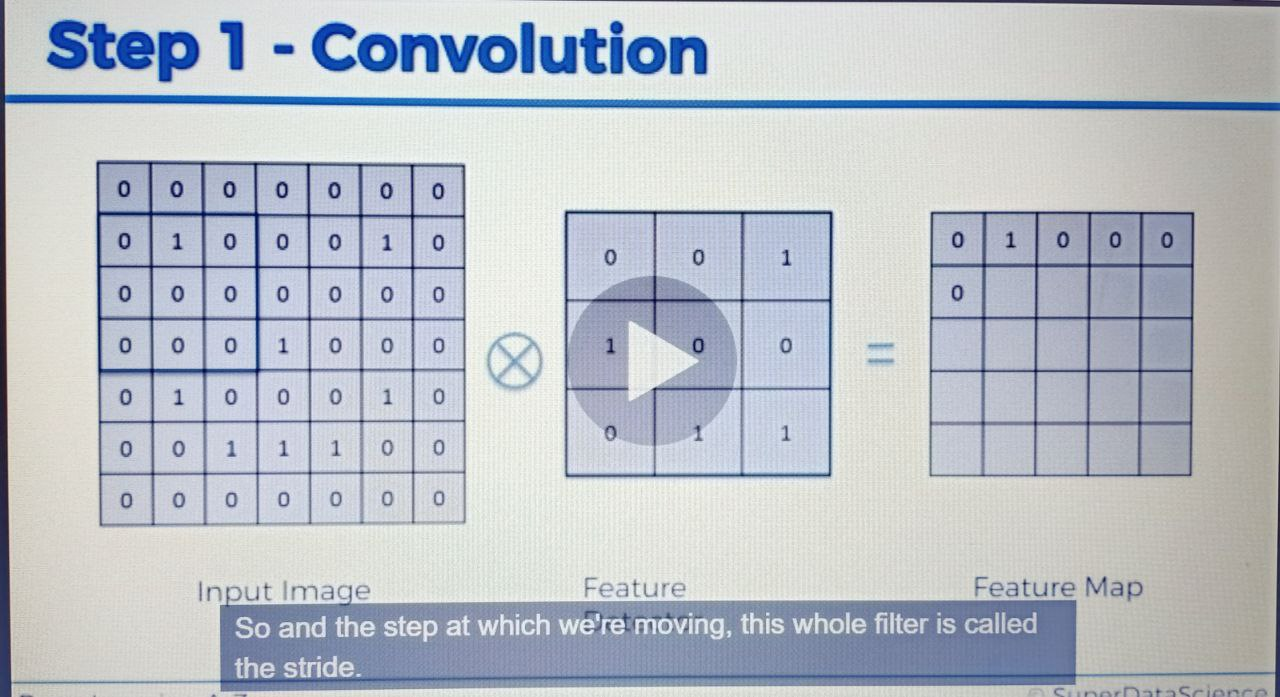

##Purpose of Convolution 

Is:- Find features in your image using the feature detector , put them into a feature map and by having them in the feature map , it still preserves the spatial realtionships betwen the pixels which is very important for us . Most of the times , the features NN will detect and uses to recognise certain images and classes will mean nothing to humans but they'll be important .  


##ReLU Layer

We need non-linearity in our models(as images themselves are highly non-linear) and for breaking linearit we might have created after using feature detector and all , we'll combine comvolutional layer with rectifier function . This is known as the ReLU layer 


##Max-Pooling
We want to preserve the features , that's why taking a stride of 2*2 in the feature map and take the max values from it and store as Pooled feature map . This way , we're reducing the size as well . Also , we're reducing parameters and this avoids overfitting . After we apply this step on all the feature maps( convolutional layer ) what we get is the pooling layer . 

## Flattening

We have to supply this pooling layer to ANN , and for this we need to flatten this . Take all the row one one by and put them sequentially in single long column , this is flatening of pooled feature map . And now this gave us one huge vector of inputs for an ANN . 

---
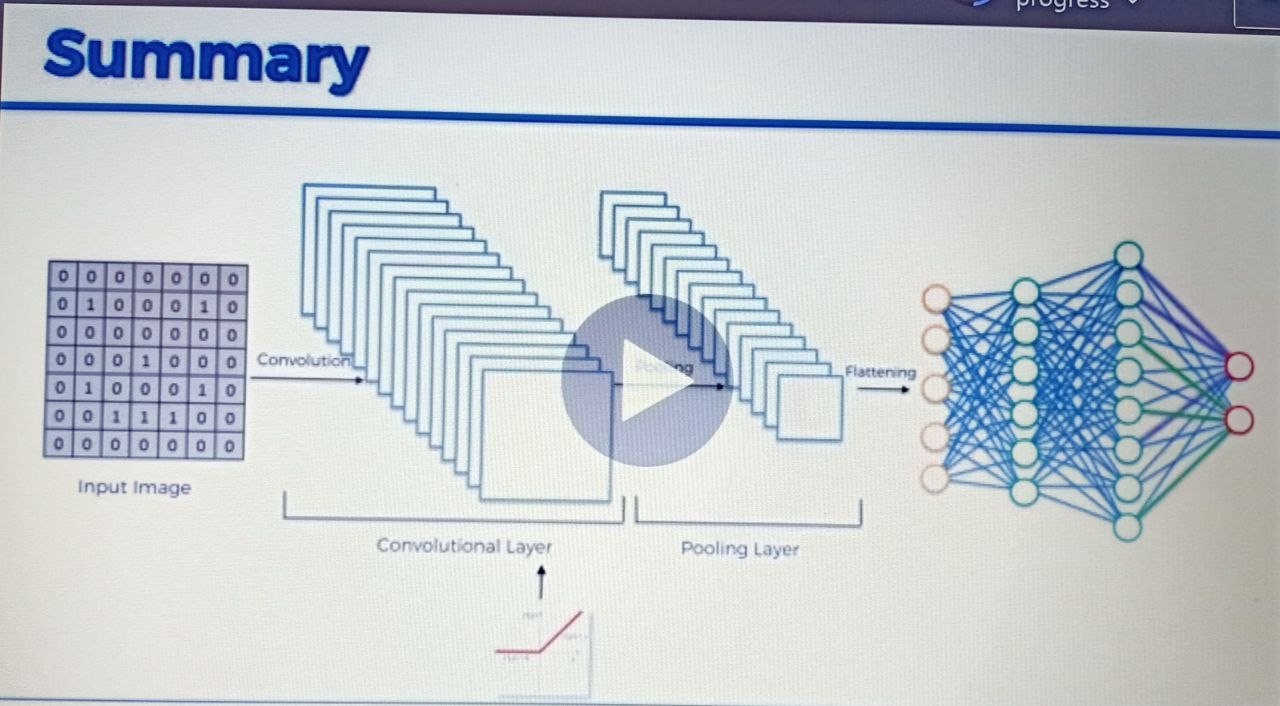


##Full Connection
Connected our ANN with the CNN and same back propogation is happening through which weights and feature detectors are getting adjusted again . This whole is the process of training the model .

---
Class dog :- takes the info(training data) , predicts the ans , sees the error(as it has y^ and y both )  and now back propogates . What does it back propogates ? :- dog neuron knows the answer because it calculated the error(it has y for this training data) , now it sees which neurons are indicating dog . With lots and lots of ierations , dog neuron learns that these features(neurons) indeed fire up when the feature belongs to dog , dog neuron will give higher weights to these features (these neurons) . Cat neuron will learn to ignore those features . When new observation ig given for prediction , now it doesn't have any error , it just listens to the high weighted neurons(decided by it only ) and if they fire up , it predicts 1 . The final layer basically acts like a voter , it does voting in deciding the ouput .


---
With 1000's of iterations if a feature is found useless for some output then it gets disregarded 

---
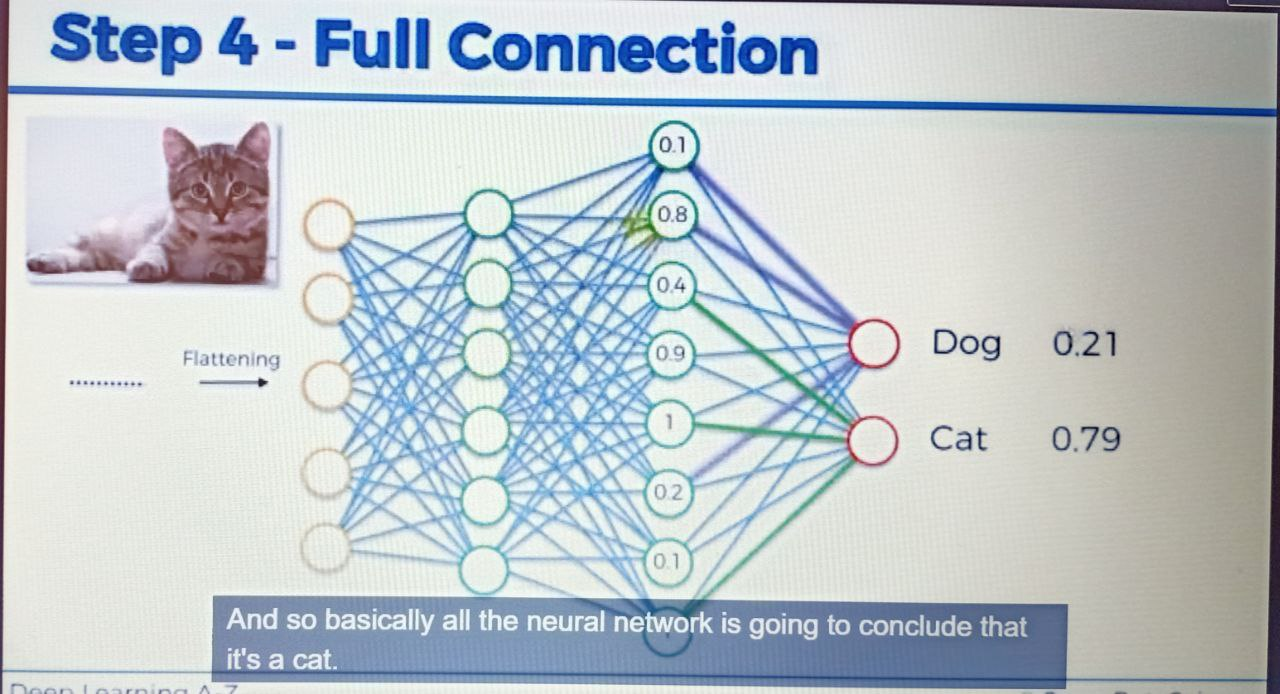



##Softmax and Cross-Entropy

Softmax function - To make the predictions of all classes(probabilities given by all classes) add upto 1 , this function is used .

Cross-Entropy functio - After appying the softmax function , this function is used to measure the error . Used for classification problems . 

## Importing the libraries

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator 
# this allows preprocessing images
# ImageDataGenerator = generates batches of tensor image data with real time data augmentation
# keras = library
# preprocessing - module
# image = sub-module

In [ ]:
tf.__version__

'2.6.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [ ]:
# We want to avoid the overfitting issue and for this we need to apply some transformations on the training set 
# Transformations = geometrical transformations basically ehich are = shifting of pixels like rotating them , flipping them , zoom in - zoom outs
# These all transformations collectively are called image augmentation and by this the CNN model doesn't overlearn and overfitting is hence cured .
# We basically augment the variety/diversity of our training set images


train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,zoom_range = 0.2, horizontal_flip = True) 
# we mae an instance of this class such that we could use this as a tool to transform our images 
# Here , one parameter is for feature scaling , as it is compulsory ffor NN. We're scalng all the pixels basically .
# As pixels takes value from 0 to 255 , if we divide every pixel by 255 , we get all the pixel value from 0 to 1, which is just like normalisation .
 

training_set = train_datagen.flow_from_directory('dataset/training_set',target_size = (64, 64),batch_size = 32, class_mode = 'binary')
# training_set = name we want to give to training set ( final training set )
# Target size = Final size of our images when they'll be fed into the CNN
# Batch_size = no . of images in each batch 
# class_mode = binary/categorical

### Preprocessing the Test set

In [ ]:
# We won't apply any transformation in the test set , we'll only scale them using feature scaling 

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',target_size = (64, 64),batch_size = 32, class_mode = 'binary')

#test_set = name of the variable containing the test set


## Part 2 - Building the CNN

### Initialising the CNN

In [ ]:
cnn = tf.keras.models.Sequential()

# CNN = ariable that'll represent the sequential class

### Step 1 - Convolution

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Added the convolutional layer from the Conv2D class
# filters = number of feature detectors we want to use
# kernel_size = size of this kernel( filter) , if n , then it means n*n matrix 
# EXcept for the output layer , activation function is chosen to be ReLU
# When we add very first layer or the input layer , we have to specify the input shape of our inputs , that's why we have to fill parameter input_shape
# 64*64 is the size that we decided earlier and 3 is for RGB , if B/W then we would've written 1 here 


### Step 2 - Pooling

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding pooling layer to convolutional layer 


### Adding a second convolutional layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

# Kerras automatically understands that it is the result of all these convolutions and pooling that will be flattened into an 1-D vector 

### Step 4 - Full Connection

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# We're doing binary classification here  1 and 0 for dog and cat 

***Upto this we build the eyes of the AI***

## Part 3 - Training the CNN

### Compiling the CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

# We're going to evaluate our same model on the test_set over epochs . We're going to train our CNN over 25 epochs 
# And at each epoch we're going to see how our model is performing on our test set images 

## Part 4 - Making a single prediction

In [ ]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
#IMP = the test_image which will become the input of the predict methid needs to be of same size as the training_set images that's why we set target_size

test_image = image.img_to_array(test_image)    
# Converted this test_image into an array as predict method expects an input as 2D array 

# As we trained our model on batches of images , so we have this extra dimension og the batch ,
# Now when we want to deploy our model on single images for prediction , that image also needs to be in a batch 
test_image = np.expand_dims(test_image, axis = 0)
# parameter = image onto which we want to put extra dimension
# Parameter = axis=0 so that the dimension of the batch which we're adding to our image will be the first dimension 

result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'